### Section 1. Timeseries forecasting for weather prediction

### **Description**

Implementing weather forecast pipeline.

### **Implementation**

In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

**Approach explanation**

**1. Pipeline**

The assignment requires us to implement a pipeline to predict the weather based on the Jena Climate dataset. In this problem, I actually do not know how to do it first since it is kinda complicated and different from the small Kaggle exercises that I have done before. For example, most of the exercises I did are usually the prediction problem by using simple pipeline, EDA and scikit-learn functions. Also, those problems can be done by using Linear Regression, Logistic Regression or other simpler algorithms.

I do research on Kaggle and Youtube, and found out that this forecasting problem require Recurrent Neural Network. Then, I decided to just stay with the simple algorithms and try my best. There will be some mistakes and not-so-original ideas in this assignment and I hope the Hiring Manager will understand for me.

The algorithm I will use here is Linear Regression and target variable will be temperature. From the dataset (will be examined more detail later), it could be seen that there is a datetime datatype. The first idea come up to my mind is that to use all of the features except for datetime since it does not affect too much to temperature. However, in a logical way, the midday timestamp is when the temperature significantly increase. This is quite true in various Asian countries, and European country like Germany is not an exception. Meanwhile, day is an incremental feature, and since we do not use such complex solution like Time-Series RNN, removing day feature is acceptable. Therefore, using the **hour** and also **month** variable will also useful for us (because month is a part of season).


**Dataset information**

Location: Beutenberg, Germany

Timestamps: 01/01/2021 - 20/05/2021 (nearly up to today)

Target variable: Temperature

**Code implementation**

**1. Dataset Preparation**

**Data information**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

In [ ]:
df_train = pd.read_csv('/content/mpi_roof.csv', encoding = "ISO-8859-1")
print("Train dataset -- Rows: {}, Columns: {}".format(df_train.shape[0], df_train.shape[1]))

Train dataset -- Rows: 20117, Columns: 22


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20117 entries, 0 to 20116
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date Time             20117 non-null  object 
 1   p (mbar)              20117 non-null  float64
 2   T (degC)              20117 non-null  float64
 3   Tpot (K)              20117 non-null  float64
 4   Tdew (degC)           20117 non-null  float64
 5   rh (%)                20117 non-null  float64
 6   VPmax (mbar)          20117 non-null  float64
 7   VPact (mbar)          20117 non-null  float64
 8   VPdef (mbar)          20117 non-null  float64
 9   sh (g/kg)             20117 non-null  float64
 10  H2OC (mmol/mol)       20117 non-null  float64
 11  rho (g/m**3)          20117 non-null  float64
 12  wv (m/s)              20117 non-null  float64
 13  max. wv (m/s)         20117 non-null  float64
 14  wd (deg)              20117 non-null  float64
 15  rain (mm)          

In [ ]:
df_train.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2021 00:10:00,978.24,2.01,276.90,-0.82,81.4,7.06,5.75,1.31,3.66,5.88,1235.72,1.02,1.63,210.3,0.0,0.0,0.0,0.0,0.0,13.48,434.7
1,01.01.2021 00:20:00,978.24,1.96,276.85,-0.79,81.9,7.04,5.77,1.27,3.67,5.89,1235.93,1.56,2.37,199.3,0.0,0.0,0.0,0.0,0.0,13.44,435.4
2,01.01.2021 00:30:00,978.26,1.88,276.76,-0.77,82.5,7.00,5.77,1.22,3.68,5.90,1236.34,2.08,2.75,207.8,0.0,0.0,0.0,0.0,0.0,13.39,434.2
3,01.01.2021 00:40:00,978.25,1.78,276.66,-0.71,83.5,6.95,5.80,1.15,3.70,5.93,1236.77,2.63,3.31,206.0,0.0,0.0,0.0,0.0,0.0,13.32,434.3
4,01.01.2021 00:50:00,978.26,1.62,276.50,-0.44,86.1,6.87,5.91,0.95,3.77,6.04,1237.43,2.16,3.28,192.9,0.0,0.0,0.0,0.0,0.0,13.22,435.8
5,01.01.2021 01:00:00,978.25,1.44,276.32,-0.21,88.7,6.78,6.01,0.77,3.83,6.15,1238.19,1.69,2.62,188.4,0.0,0.0,0.0,0.0,0.0,13.10,436.5
6,01.01.2021 01:10:00,978.24,1.28,276.16,-0.08,90.6,6.70,6.07,0.63,3.87,6.21,1238.87,0.91,1.61,185.9,0.0,130.0,0.0,0.0,0.0,12.99,436.9
7,01.01.2021 01:20:00,978.25,1.23,276.12,0.08,92.0,6.68,6.15,0.53,3.92,6.28,1239.05,0.59,1.27,171.4,0.0,430.0,0.0,0.0,0.0,12.91,436.3
8,01.01.2021 01:30:00,978.26,1.11,275.99,0.23,93.8,6.62,6.21,0.41,3.96,6.35,1239.60,1.10,1.86,134.7,0.0,600.0,0.0,0.0,0.0,12.87,437.3
9,01.01.2021 01:40:00,978.27,0.81,275.68,0.41,97.2,6.48,6.29,0.18,4.01,6.43,1240.94,1.47,2.40,165.4,0.0,600.0,0.0,0.0,0.0,12.85,438.6


The features of this dataset will be described as follows:
1. p - Air pressure (SI: mbar)
2. T - Air Temperature (SI: Celsius)
3. Tpot - Air Temperature (SI: Kelvin (+273.42 K))
4. rh - Relative humidity (SI: %)
5. VPmax, VPact, VPdef - Water vapor pressure (saturation, actual, decifit)
5. sh - Specific humidity (SI: $g kg^-1$)
6. H2OC - Water vapor concentration (SI: $m mol mol^{-1}$)
5. rho - Air density (SI: $gm^{-3}$)
7. wv, maxwv - Wind velocity (average, maximum) (SI: $ms^{-1}$)
8. wd - Wind direction (SI: Degree)
9. rain - Precipitation (SI: mm)
10. raining - Duration of precipitation (SI: second)
11. SWDR - Short wave downward radiation (SI: $Wm^{−2}$)
12. PAR - Photosynthetically active radiation (SI: $μmol m^{-2} s^{−1}$)
13. max. PAR - Maximum photosynthetically active radiation SI: $μmol m^{-2} s^{−1}$)
14. Tlog - Internal logger temperature (SI: Celsius)
15. CO2 - CO2-concentration of ambient air (SI: ppm)

**2. Exploration Data Analysis**

**Check missing values**

In [ ]:
# Check missing values
def check_missing(df):
    # Create a hash dictionary contain missing ratio of each feature
    miss_dict = {}
    for columns in df:
        count = df[columns].isna().sum()
        ratio = count/len(df[columns])
        datatype = df[columns].dtype
        miss_dict[columns] = [count, ratio, datatype]
    
    return miss_dict

In [ ]:
miss_ratio = pd.DataFrame(check_missing(df_train), ['Total', 'Ratio', 'Type']).T
print("Missing ratio table")
miss_ratio

Missing ratio table


,Total,Ratio,Type
Date Time,0,0,object
p (mbar),0,0,float64
T (degC),0,0,float64
Tpot (K),0,0,float64
Tdew (degC),0,0,float64
rh (%),0,0,float64
VPmax (mbar),0,0,float64
VPact (mbar),0,0,float64
VPdef (mbar),0,0,float64
sh (g/kg),0,0,float64


There are no missing values and that is really great.

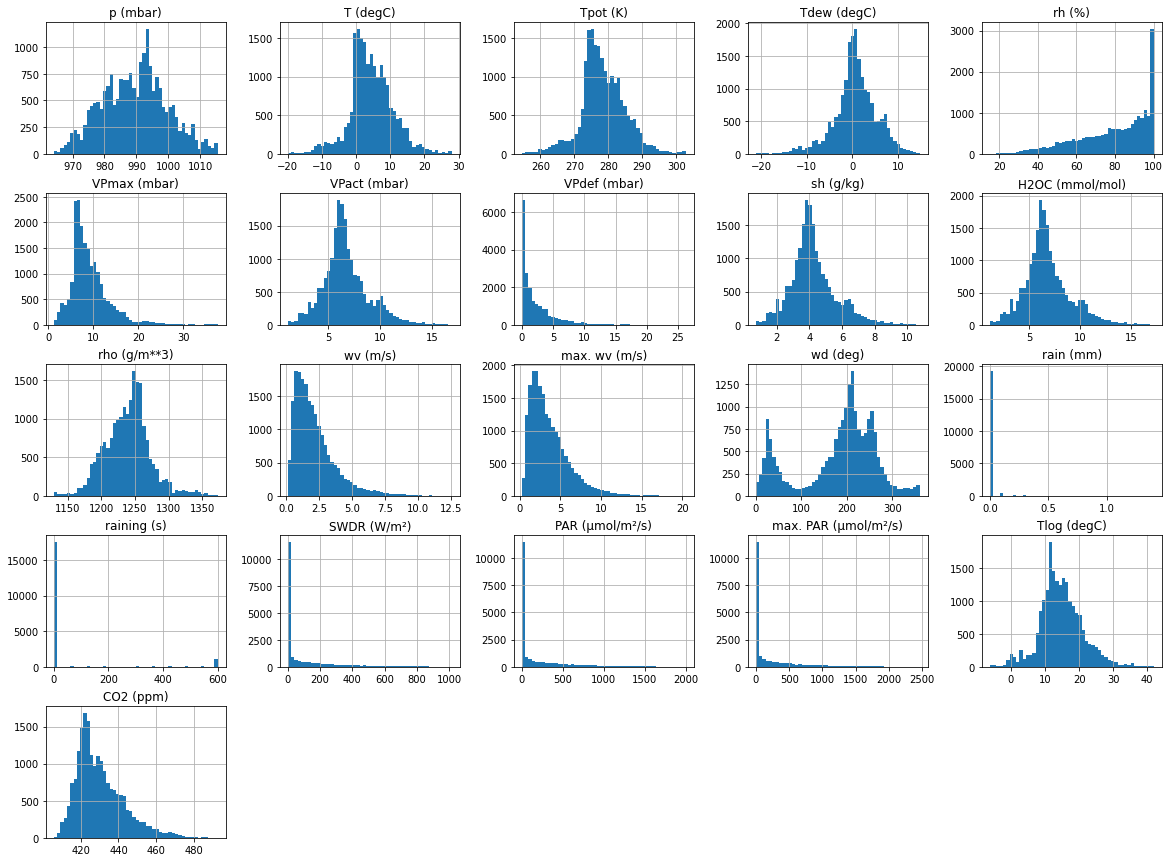

In [ ]:
df_train.hist(bins=50, figsize=(20, 15))
plt.show()

**Data splitting**

There are few things we need to keep in mind during EDA:
1. Since this is a completely numerical dataset, label encoder is not needed.
2. Since the data does not have missing values as we have found out, imputing method is also not needed.
3. Datetime feature will be removed and replaced by hour and month features.
4. Because the dataset timestamps is the first 5 months of 2021, year variable is also redundant.
5. We will leave the **latest 8 days** for forecasting. The rest dataset will be used for training

In [ ]:
df_final_test = df_train.iloc[-8:].copy()
df_train = df_train[0:-8].copy()

The length of dataset is now reduced from 20117 to 20109.

In [ ]:
from sklearn.model_selection import train_test_split

train_ds, test_ds = train_test_split(df_train, test_size=0.2, random_state=22)

**Datetime components**

In [ ]:
from datetime import datetime
eda_ds = train_ds.copy()

eda_ds["Date Time"] = eda_ds["Date Time"].astype("datetime64[s]")
eda_ds["Hour"] = eda_ds["Date Time"].dt.hour
eda_ds["Month"] = eda_ds["Date Time"].dt.month

**Correlation matrix**

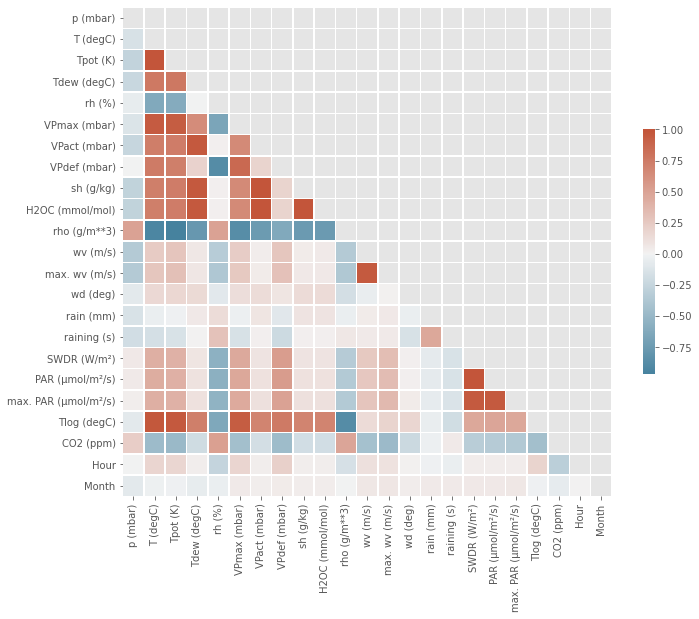

In [ ]:
corr = eda_ds.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sn.diverging_palette(230, 20, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the figure above, air density (rho) seems to have the least correlation coefficient with temperate (T), followed by relative humidity (rh) and CO2-concentration of ambient air (CO2), month, rain and raining. All other features have stronger correlations, which are greater than 0.

In [ ]:
corr["T (degC)"].sort_values(ascending=False)

T (degC)                1.000000
Tpot (K)                0.992591
Tlog (degC)             0.976569
VPmax (mbar)            0.948109
Tdew (degC)             0.767821
VPdef (mbar)            0.748538
VPact (mbar)            0.731812
H2OC (mmol/mol)         0.729700
sh (g/kg)               0.729388
PAR (µmol/m²/s)         0.432990
SWDR (W/m²)             0.421903
max. PAR (µmol/m²/s)    0.420664
max. wv (m/s)           0.277979
wv (m/s)                0.245179
Hour                    0.179593
wd (deg)                0.163523
Month                  -0.017863
rain (mm)              -0.028589
p (mbar)               -0.143729
raining (s)            -0.160831
CO2 (ppm)              -0.470443
rh (%)                 -0.628987
rho (g/m**3)           -0.924421
Name: T (degC), dtype: float64

Specifically, we will choose the features with strong correlation. The Tpot is basically T are so it will be an exception.

**3. Pipeline implementation**

**Removing label from dataset**

In [ ]:
train_x = train_ds.drop("T (degC)", axis=1).copy()
train_x = train_x[["VPmax (mbar)",  "VPdef (mbar)", "Tlog (degC)", "Tdew (degC)",
                   "VPdef (mbar)", "VPact (mbar)", "H2OC (mmol/mol)", "sh (g/kg)"]]
train_y = train_ds["T (degC)"].copy()
train_x.head(10)

,VPmax (mbar),VPdef (mbar),Tlog (degC),Tdew (degC),VPdef (mbar),VPact (mbar),H2OC (mmol/mol),sh (g/kg)
729,6.24,0.00,10.81,0.28,0.00,6.24,6.32,3.94
1630,6.51,0.53,8.94,-0.28,0.53,5.98,6.11,3.81
9835,7.20,0.32,13.35,1.63,0.32,6.87,6.93,4.32
10527,7.59,1.25,13.04,0.51,1.25,6.34,6.45,4.02
1798,7.40,1.67,11.81,-0.88,1.67,5.73,5.81,3.62
18141,8.87,0.41,16.22,4.56,0.41,8.46,8.65,5.40
17055,16.78,7.35,24.65,6.11,7.35,9.43,9.66,6.03
5348,4.71,0.25,4.25,-4.21,0.25,4.47,4.56,2.84
9103,6.84,0.00,11.77,1.56,0.00,6.84,6.89,4.29
9663,5.08,0.22,8.46,-3.09,0.22,4.86,4.89,3.05


In [ ]:
test_x = test_ds.drop("T (degC)", axis=1).copy()
test_x = test_x[["VPmax (mbar)",  "VPdef (mbar)", "Tlog (degC)", "Tdew (degC)",
                   "VPdef (mbar)", "VPact (mbar)", "H2OC (mmol/mol)", "sh (g/kg)"]]
test_y = test_ds["T (degC)"].copy()
test_x.head(10)

,VPmax (mbar),VPdef (mbar),Tlog (degC),Tdew (degC),VPdef (mbar),VPact (mbar),H2OC (mmol/mol),sh (g/kg)
19616,11.06,0.71,17.61,7.46,0.71,10.35,10.59,6.61
6726,9.12,1.04,18.90,3.89,1.04,8.08,8.16,5.09
11868,10.77,3.44,20.70,2.53,3.44,7.33,7.34,4.58
4803,11.00,1.20,14.98,6.67,1.20,9.81,10.05,6.27
5971,4.86,1.27,8.54,-7.04,1.27,3.60,3.60,2.24
15290,7.88,2.45,14.19,-1.59,2.45,5.44,5.46,3.40
6631,6.88,0.59,10.12,0.40,0.59,6.29,6.31,3.94
19307,10.23,0.00,18.07,7.29,0.00,10.23,10.42,6.51
11816,7.29,0.54,13.14,1.38,0.54,6.75,6.76,4.22
2085,5.94,0.49,9.60,-1.55,0.49,5.45,5.47,3.41


**K-Fold Validator**

Since we only have train and test dataset, using KFold will enable us to create validation dataset during the training process.

The original train dataset will be divided into N groups, and during each training iteration, N-1 parts will be used for training, and the remaining part will be use for validation. This would help us to prevent overfiting without using the test dataset in the beginning.

In [ ]:
from sklearn.model_selection import KFold
# Prepare cross validation
kfolds = KFold(n_splits=5, shuffle=True, random_state=1)

**Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

lg_model = Pipeline([('scaler', StandardScaler()),
                      ('estimator', LinearRegression())])

**GridSearch CV**

GirdSearch CV is used to find out the best hyperparameter settings for our estimator algorithm.

In [ ]:
from sklearn.model_selection import GridSearchCV

## Search grid for optimal parameters
lg_grid = [{'estimator__fit_intercept':[True,False], 
             'estimator__normalize':[True,False],
             'estimator__copy_X':[True, False]}]

**Train the model**

In [ ]:
final_model = GridSearchCV(lg_model, param_grid = lg_grid, scoring='neg_mean_absolute_error', cv=kfolds, verbose=1)
final_model.fit(train_x, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('estimator',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'estimator__copy_X': [True, False],
                          'estimator__fit_intercept': [True, False],
                          'esti

In [ ]:
print("Best hyperparameters setting: \n{}".format(final_model.best_params_))

Best hyperparameters setting: 
{'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__normalize': True}


**Predict the test dataset**

In [ ]:
from sklearn.metrics import mean_squared_error
pred_y = final_model.predict(test_x)
mean_squared_error(pred_y, test_y)

0.9129030106331683

**Scatter the plot of predictions based on few features**

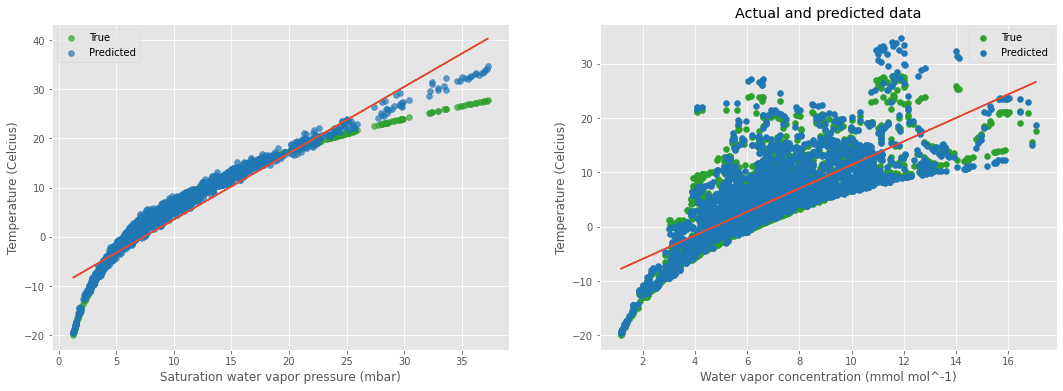

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18,6))
plt.title('Actual and predicted data')
plt.style.use('ggplot')
# Scatter plot
axs[0].scatter(test_x['VPmax (mbar)'], test_y, color="tab:green", label="True", alpha=0.7)
axs[0].scatter(test_x['VPmax (mbar)'], pred_y, color="tab:blue", label="Predicted", alpha=0.7)

# Fit line
m1, b1 = np.polyfit(test_x['VPmax (mbar)'], pred_y, 1)
axs[0].plot(test_x['VPmax (mbar)'], m1*test_x['VPmax (mbar)'] + b)

axs[0].set_xlabel('Saturation water vapor pressure (mbar)')
axs[0].set_ylabel('Temperature (Celcius)')
axs[0].legend()

axs[1].scatter(test_x['H2OC (mmol/mol)'], test_y, color="tab:green", label="True")
axs[1].scatter(test_x['H2OC (mmol/mol)'], pred_y, color="tab:blue", label="Predicted")

# Fit line
m2, b2 = np.polyfit(test_x['H2OC (mmol/mol)'], pred_y, 1)
axs[1].plot(test_x['H2OC (mmol/mol)'], m2*test_x['H2OC (mmol/mol)'] + b2)

axs[1].set_xlabel('Water vapor concentration (mmol mol^-1)')
axs[1].set_ylabel('Temperature (Celcius)')
axs[1].legend()

**Predict randomly**

In [ ]:
df_X = df_final_test.drop("T (degC)", axis=1).copy()
df_X = df_X[["VPmax (mbar)",  "VPdef (mbar)", "Tlog (degC)", "Tdew (degC)",
                   "VPdef (mbar)", "VPact (mbar)", "H2OC (mmol/mol)", "sh (g/kg)"]]

In [ ]:
y_pred = final_model.predict(df_X)
y_true = df_final_test['T (degC)']
print("True value: {}\nPredicted value: {}".format(list(y_true.values), list(np.round(y_pred,2))))

True value: [14.41, 14.07, 14.05, 14.67, 14.95, 14.8, 14.66, 14.76]
Predicted value: [15.73, 15.33, 15.21, 15.56, 15.7, 15.59, 15.46, 15.53]


**Conclusion**

The predicted temperature is less than the true temperature approximately 1.3 in average from the above results. In the reality, difference in 1-2 degree of Celcius is not really a big problem (maybe to me). In the end, the model works out and can forecast in a decent accuracy. Neverthless, similarly to Section 3. Addition Function, this problem still have some spaces for improvements regarding the accuracy of the model.